In [1]:
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import pandas as pd
import numpy as np

In [30]:
df = pd.read_csv (r'C:\Users\aryan\Desktop\Ar\archive\modified.csv')

In [31]:
df.head()

,CODE,COUNTRY,DATE,HDI,TC,TD,STI,POP,GDP
0,AFG,Afghanistan,31-12-2019,0.498,0,0,0.0,38928341,1803.987
1,AFG,Afghanistan,1/1/2020,0.498,0,0,0.0,38928341,1803.987
2,AFG,Afghanistan,2/1/2020,0.498,0,0,0.0,38928341,1803.987
3,AFG,Afghanistan,3/1/2020,0.498,0,0,0.0,38928341,1803.987
4,AFG,Afghanistan,4/1/2020,0.498,0,0,0.0,38928341,1803.987


In [32]:
df.tail()

,CODE,COUNTRY,DATE,HDI,TC,TD,STI,POP,GDP
50197,ZWE,Zimbabwe,15-10-2020,0.535,8055,231,76.85,14862927,1899.775
50198,ZWE,Zimbabwe,16-10-2020,0.535,8075,231,76.85,14862927,1899.775
50199,ZWE,Zimbabwe,17-10-2020,0.535,8099,231,76.85,14862927,1899.775
50200,ZWE,Zimbabwe,18-10-2020,0.535,8110,231,76.85,14862927,1899.775
50201,ZWE,Zimbabwe,19-10-2020,0.535,8147,231,76.85,14862927,1899.775


In [33]:
 df["STI"]

0         0.00
1         0.00
2         0.00
3         0.00
4         0.00
         ...  
50197    76.85
50198    76.85
50199    76.85
50200    76.85
50201    76.85
Name: STI, Length: 50202, dtype: float64

In [34]:
df.median(axis = 0)

HDI          0.768
TC        1222.000
TD          24.000
STI         59.970
POP    8654618.000
dtype: float64

In [35]:
df.isnull().sum()

CODE       0
COUNTRY    0
DATE       0
HDI        0
TC         0
TD         0
STI        0
POP        0
GDP        0
dtype: int64

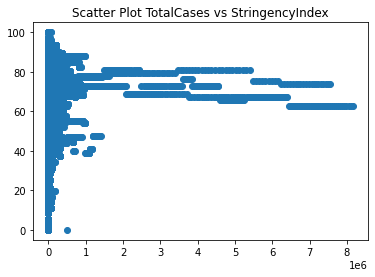

In [36]:
a=df['TC']
b=df['STI']
plt.scatter( a, b, cmap='rainbow')
plt.title('Scatter Plot TotalCases vs StringencyIndex')
plt.show()

Model using STI(Strigency Index)
It provides a picture of the stage at which any country enforced its strongest measures.
Range : 0 - 100

A higher score indicates a stricter response (i.e. 100 = strictest response). 

It’s important to note that this index simply records the strictness of government policies.

In [37]:
def sticonv(val):
    if val>=50:
        return 1
    else:
        return 0

df["STI"] = df["STI"].apply(sticonv, 1) 

In [38]:
df.describe()

,HDI,TC,TD,STI,POP
count,50202.000000,5.020200e+04,50202.000000,50202.000000,5.020200e+04
mean,0.737259,6.242276e+04,2327.752779,0.637524,4.269823e+07
std,0.152764,3.930920e+05,12292.572860,0.480720,1.567722e+08
min,0.354000,0.000000e+00,0.000000,0.000000,8.090000e+02
25%,0.640000,6.700000e+01,1.000000,0.000000,1.402985e+06
50%,0.768000,1.222000e+03,24.000000,1.000000,8.654618e+06
75%,0.863000,1.355750e+04,280.000000,1.000000,2.982597e+07
max,0.953000,8.154595e+06,219674.000000,1.000000,1.439324e+09


In [39]:
arr1 = df["TC"].to_numpy()
arr2 = df["STI"].to_numpy()

In [40]:
x,y = arr1,arr2
print(y)

[0 0 0 ... 1 1 1]


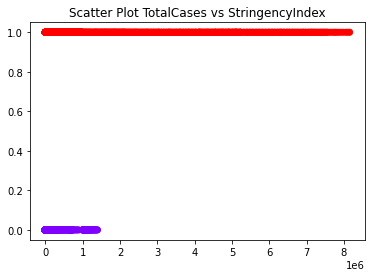

In [41]:
plt.scatter(x, y, c=y, cmap='rainbow')
plt.title('Scatter Plot TotalCases vs StringencyIndex')
plt.show()

In [42]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=1)
x_train = np.reshape(x_train, (37651, 1))
x_test= np.reshape(x_test, (12551, 1))
print(x_train.shape)
print(y_train.shape)

(37651, 1)
(37651,)


In [43]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

LogisticRegression()

In [44]:
print(logreg.coef_)
print(logreg.intercept_)

[[5.828816e-06]]
[1.08758367e-09]


In [45]:
y_pred = logreg.predict(x_test)

In [46]:
cf_matrix=confusion_matrix(y_test, y_pred)
confusion_matrix(y_test, y_pred)

array([[   0, 4507],
       [   0, 8044]], dtype=int64)

<AxesSubplot:>

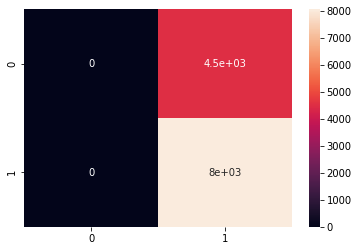

In [47]:
import seaborn as sns
sns.heatmap(cf_matrix, annot=True)

<AxesSubplot:>

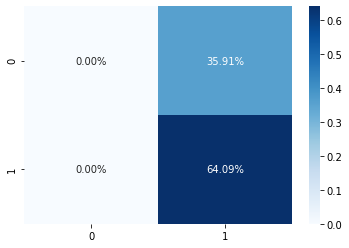

In [48]:
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

In [50]:
score = logreg.score(x_test, y_test)
print(score)

0.6409051071627758


In [51]:
mtest = [[4384]]
prediction = logreg.predict(mtest)
print(prediction)


[1]
